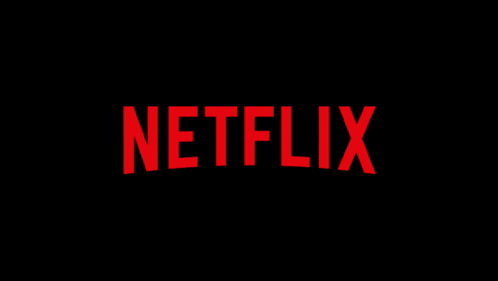

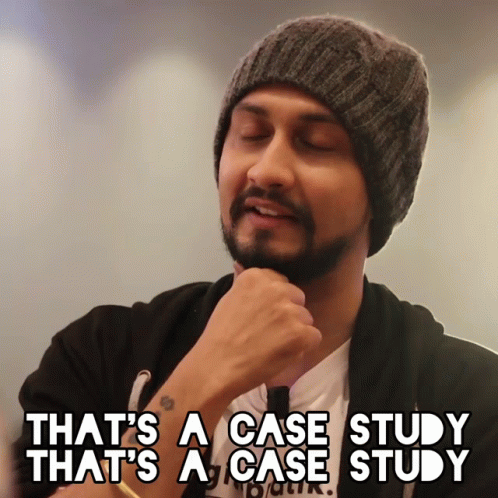


#### Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#### Data Loading 

In [2]:
df = pd.read_csv(r'D:\Scaler\Case Studies\Netflix - DAV Busniess Case\Data.csv')

# Data Cleaning

### Data Inspection

In [3]:
# First 5 Rows
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [4]:
# Shape of the data - How Many Rows and Columns
df.shape

(8807, 12)

In [5]:
# Data Type Checking 
df.dtypes 

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

#### Observations 💡

1. There are some Datetime Data Types are there we need to Change to Date Time Data Type (date_added) column
2. Rest all Columns have Approproiate Data Types

In [6]:
# Dataset Info such as datatype,null values etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# Basic Statistics (Numerical Data Only)
df.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [8]:
# Basic Statistics (Non-Numerical/Categorical Data Only)
df.describe(include='all')

show_id   type   title       director                cast  \
count     8807   8807    8807           6173                7982   
unique    8807      2    8804           4528                7692   
top         s1  Movie  15-Aug  Rajiv Chilaka  David Attenborough   
freq         1   6131       2             19                  19   
mean       NaN    NaN     NaN            NaN                 NaN   
std        NaN    NaN     NaN            NaN                 NaN   
min        NaN    NaN     NaN            NaN                 NaN   
25%        NaN    NaN     NaN            NaN                 NaN   
50%        NaN    NaN     NaN            NaN                 NaN   
75%        NaN    NaN     NaN            NaN                 NaN   
max        NaN    NaN     NaN            NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7976             8797   8807.000000   8803      8804   
unique            748             1767           NaN     17       220   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2818              109           NaN   3207      1793   
mean              NaN              NaN   2014.180198    NaN       NaN   
std               NaN              NaN      8.819312    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2019.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

                           listed_in  \
count                           8807   
unique                           514   
top     Dramas, International Movies   
freq                             362   
mean                             NaN   
std                              NaN   
min                              NaN   
25%                              NaN   
50%                              NaN   
75%                              NaN   
max                              NaN   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

### Type Casting (Data Type Conversions) 

In [9]:
# Data Types
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [10]:
# Date_Added

df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')
df.head(3)
# Strip is used for handling inconsistency data in given column 

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...

In [11]:
# release_year
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')

In [12]:
# Updated df
df.head(3)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

  date_added release_year rating   duration  \
0 2021-09-25   2020-01-01  PG-13     90 min   
1 2021-09-24   2021-01-01  TV-MA  2 Seasons   
2 2021-09-24   2021-01-01  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...

In [13]:
# Updated Data Types
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year    datetime64[ns]
rating                  object
duration                object
listed_in               object
description             object
dtype: object

### Handling Missing / NULL  Values

In [14]:
# Missing Values are represented by using NaN in pandas 
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### Duration

In [15]:
duration_temp = df[df['duration'].isnull()]
duration_temp

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country date_added release_year  rating duration  \
5541  Louis C.K.  United States 2017-04-04   2017-01-01  74 min      NaN   
5794  Louis C.K.  United States 2016-09-16   2010-01-01  84 min      NaN   
5813  Louis C.K.  United States 2016-08-15   2015-01-01  66 min      NaN   

     listed_in                                        description  
5541    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813    Movies  The comic puts his trademark hilarious/thought...

In [16]:
for i in duration_temp['rating']:
    index = df.loc[df['rating'] == i].index[0]
    df.loc[index, 'duration'] = i 

In [17]:
df[df['duration'].isnull()]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

#### Directors,Rating Cast,Country

In [18]:
df.fillna({'director' : 'Unknown','cast':
'Unknown','country':'Unknown', 'rating': df['rating'].mode()[0],'date_added':df['date_added'].mode()[0]},inplace = True)

In [19]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Splitting Duration and Converting to int 

In [20]:
# Only Movies have Duration as min 

In [21]:
df['duration'] = df['duration'].str.split(" ").str[0]

In [22]:
df['duration'].isna().sum()

0

In [23]:
df['duration'].fillna(0,inplace = True)

In [24]:
df['duration'] = df['duration'].astype(int)

### Nested Column Check

In [25]:
def has_nested_col(col):
    for value in col:
        if ',' in str(value):
            return True
    return False


nested_cols = [col for col in df.columns if has_nested_col(df[col])]
nested_cols

['title', 'director', 'cast', 'country', 'listed_in', 'description']

In [26]:
df[df.duplicated()]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

In [27]:
df['cast']=df['cast'].str.split(",")
df['listed_in'] = df['listed_in'].str.split(",")
df['director'] = df['director'].str.split(",")
df['country'] = df['country'].str.split(",")

In [28]:
df = df.explode('cast').reset_index(drop=True)
df = df.explode('director').reset_index(drop=True)
df = df.explode('listed_in').reset_index(drop=True)
df = df.explode('country').reset_index(drop=True)

In [29]:
df.shape

(202065, 12)

### Removing Leading and Trailing Spaces from all Columns

In [30]:
def df_strip(df):
    for i in df.columns:
        if df[i].dtype == 'object':
            df[i] = df[i].map(str.strip)
            print(f'Spaces Removed in {i}')
        else:
            pass
df_strip(df)

Spaces Removed in show_id
Spaces Removed in type
Spaces Removed in title
Spaces Removed in director
Spaces Removed in cast
Spaces Removed in country
Spaces Removed in rating
Spaces Removed in listed_in
Spaces Removed in description


#### Observations 💡

All Null Values are treated 

# 1 Find the Counts of each categorical variable both using graphical and non graphical analysis

In [31]:
# Top 10 Directors
dir_cnts = df.groupby('director')['title'].nunique().sort_values(ascending = False).drop('Unknown')
top_10_Directors = dir_cnts.head(10)
top_10_Directors

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Martin Scorsese        12
Youssef Chahine        12
Name: title, dtype: int64

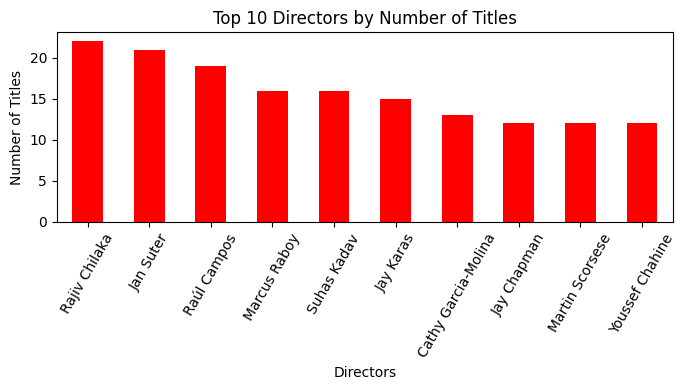

In [32]:
netflix_color_palette = sns.color_palette(['black','red'])
plt.figure(figsize=(7, 4))
top_10_Directors.plot(kind='bar', color='red')
plt.xlabel('Directors')
plt.ylabel('Number of Titles')
plt.title('Top 10 Directors by Number of Titles')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [33]:
# Top 10 Cast
cast_cnts = df.groupby('cast')['title'].nunique().sort_values(ascending = False).drop('Unknown')
top_10_Cast =  cast_cnts.head(10)

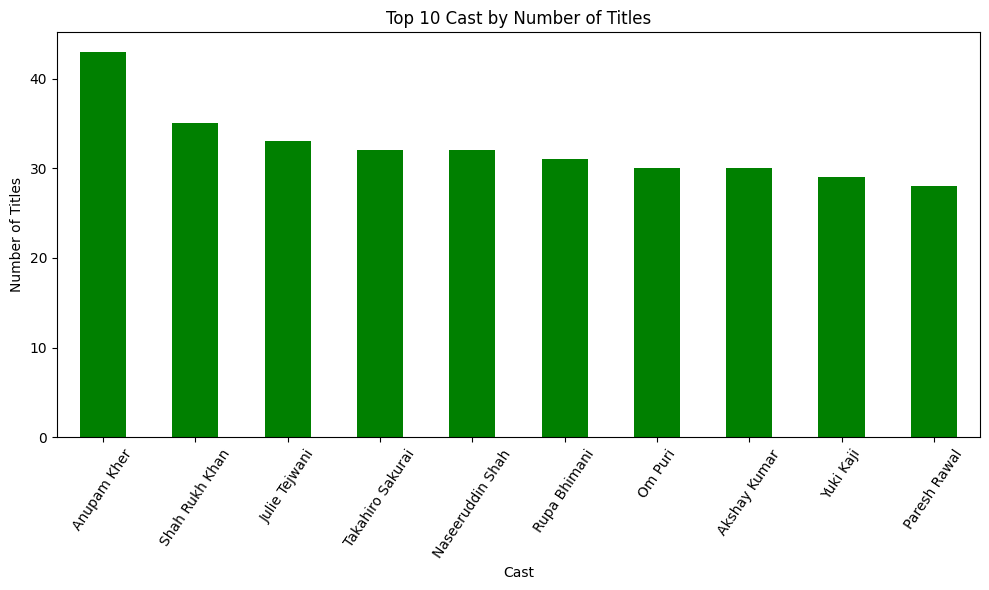

In [34]:
plt.figure(figsize=(10, 6))
top_10_Cast.plot(kind='bar', color='green')
plt.xlabel('Cast')
plt.ylabel('Number of Titles')
plt.title('Top 10 Cast by Number of Titles')
plt.xticks(rotation=56)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [35]:
# Top 10 Countries 
country_cnts = df.groupby('country')['title'].nunique().sort_values(ascending = False).drop('Unknown')
top_10_countries = country_cnts.head(10)

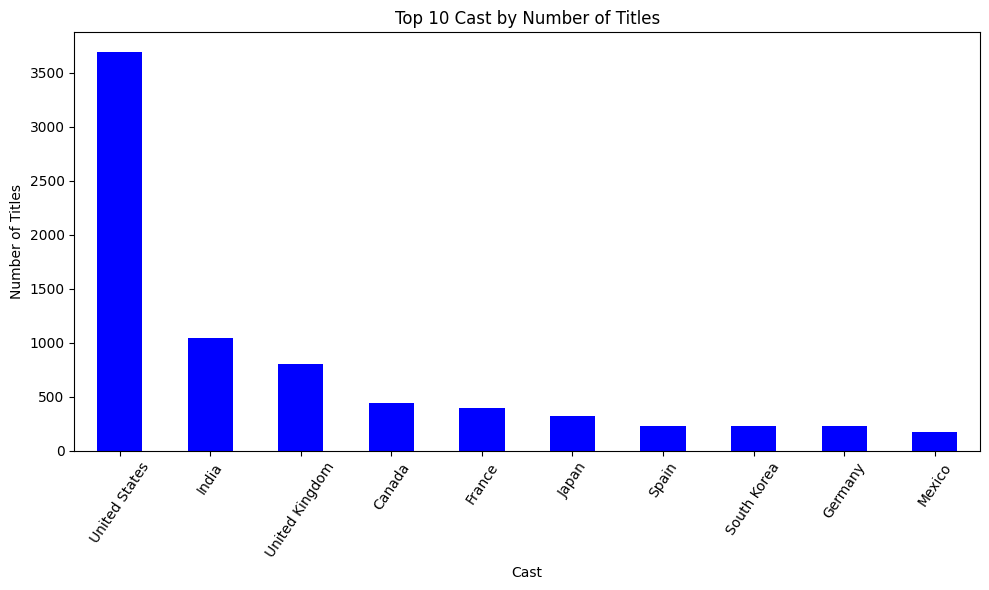

In [36]:
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='blue')
plt.xlabel('Cast')
plt.ylabel('Number of Titles')
plt.title('Top 10 Cast by Number of Titles')
plt.xticks(rotation=56)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [37]:
# Top Listed in 
listed_in_cnts = df.groupby('listed_in')['title'].nunique().sort_values(ascending = False)
top_10_listed_in = listed_in_cnts.head(10)

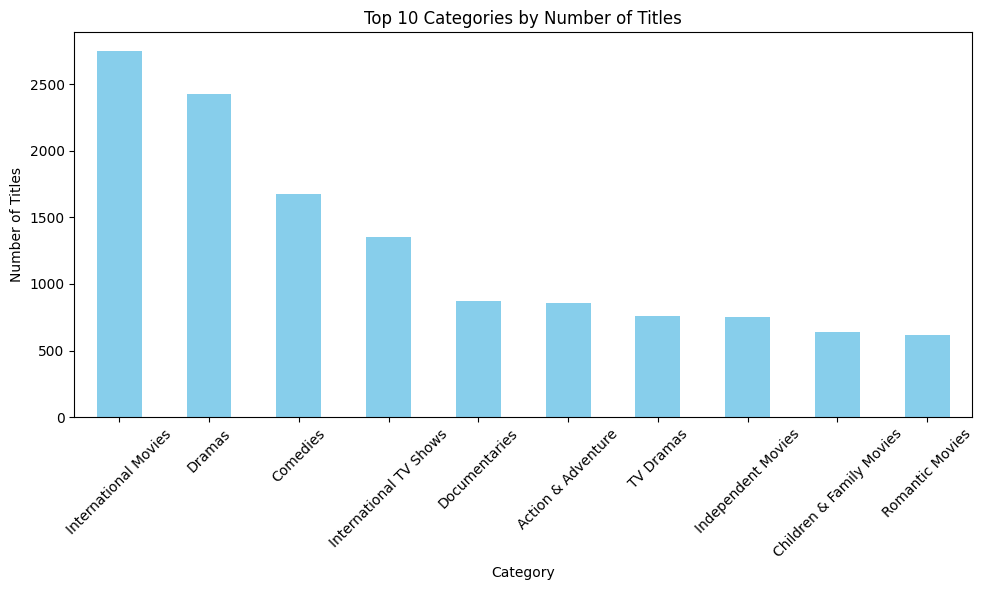

In [38]:
plt.figure(figsize=(10, 6))
top_10_listed_in.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Titles')
plt.title('Top 10 Categories by Number of Titles')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Date_added breakdown

In [39]:
df['year_added']=df['date_added'].dt.year.astype('Int64')
df['month_added']=df['date_added'].dt.month_name().str[0:3]
df['month_added']=df['date_added'].dt.month_name().str[0:3]
df['week_added']=df['date_added'].dt.isocalendar().week.astype('Int64')

In [40]:
df.head(2)

show_id     type                 title         director        cast  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson     Unknown   
1      s2  TV Show         Blood & Water          Unknown  Ama Qamata   

         country date_added release_year rating  duration  \
0  United States 2021-09-25   2020-01-01  PG-13        90   
1   South Africa 2021-09-24   2021-01-01  TV-MA         2   

                listed_in                                        description  \
0           Documentaries  As her father nears the end of his life, filmm...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   

   year_added month_added  week_added  
0        2021         Sep          38  
1        2021         Sep          38

# 2. How has the number of movies released per  year changed over the last 20-30 years

In [41]:
# Exracting movie and tv data
movie_data = df[df.type=='Movie'].copy()
tv_data = df[df.type=='TV Show'].copy()
movie_year = movie_data[['type','release_year']].reset_index(drop= True)

# 3. Comparison of TV Shows & Movies

Text(0.5, 1.0, 'TV Shows vs. Movies: A Visual Comparison')

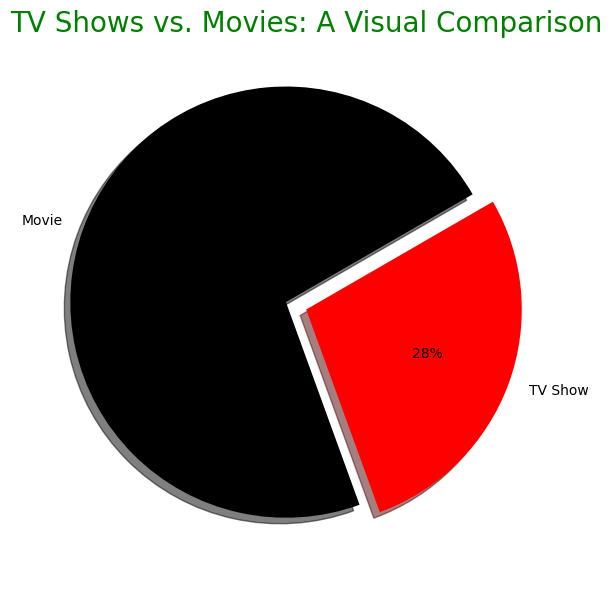

In [42]:
plt.figure(figsize=(12,7))
plt.tight_layout()
plt.pie(df.groupby('type')['show_id'].count(), labels=df.type.unique(), colors=netflix_color_palette, autopct='%.0f%%', explode =
[0.1, 0], shadow = True, startangle=30)
plt.title('TV Shows vs. Movies: A Visual Comparison',fontsize=20, color = 'green')

#### Observations 💡

Movies are enjoyed by audiences more than twice as often as TV shows, highlighting 
their popularity in the realm of entertainment.

# 3a. Find the number of movies produced in each country and pick the top 10 countries

In [43]:
movie_data.groupby('country')['title'].nunique().drop('Unknown').sort_values(ascending=False)[:10].reset_index()


country  title
0   United States   2751
1           India    961
2  United Kingdom    534
3          Canada    319
4          France    303
5         Germany    182
6           Spain    171
7           Japan    119
8           China    114
9          Mexico    111

#### Observations 💡

United States stands in the first place in producing netflix movies with a count of '2364' 
and next stands India with a movie count of '962'.


# 3b. Find the number of TV-shows Produced in Each Country and pick the top 10 countries.


In [44]:
tv_data.groupby('country')['title'].nunique().drop('Unknown').sort_values(ascending=False)[:10].reset_index()


country  title
0   United States    938
1  United Kingdom    272
2           Japan    199
3     South Korea    170
4          Canada    126
5          France     90
6           India     84
7          Taiwan     70
8       Australia     66
9           Spain     61

#### Observations 💡

United States stands in the first place in producing netflix Tv-shows with a count of 
'938' and next stands India with a movie count of '272'.


# 4. What is the best time to launch a TV show?


## Month Wise

In [45]:
# TV Shows grouping by Month
tv_data_monthGroup = tv_data.groupby('month_added')['show_id'].apply(lambda x : x.count()).reset_index()
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
tv_data_monthGroup = tv_data_monthGroup.sort_values('month_added',key = lambda x : x.apply (lambda x : month_dict[x]))

C:\Users\LOKESH\AppData\Local\Temp\ipykernel_22112\2005661385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = tv_data_monthGroup.month_added.unique(), y = tv_data_monthGroup.show_id, palette = cond_color_palette)


Text(0.5, 1.0, 'Best month to release TV Shows')

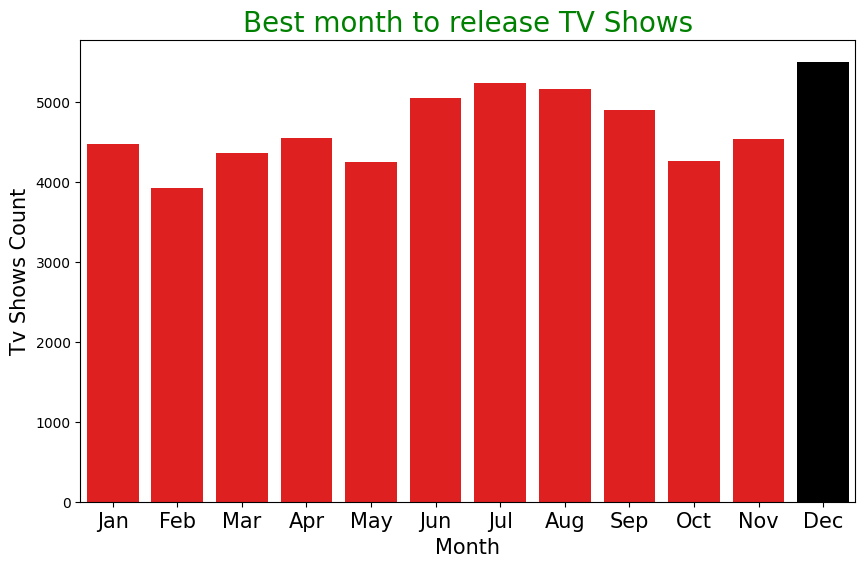

In [46]:
plt.figure(figsize=(10, 6))
cond_color_palette = ['red' if (x < max(tv_data_monthGroup.show_id)) else 'black' for x in tv_data_monthGroup.show_id]
sns.barplot(x = tv_data_monthGroup.month_added.unique(), y = tv_data_monthGroup.show_id, palette = cond_color_palette)
plt.xlabel('Month', fontsize= 15, color = 'black')
plt.ylabel('Tv Shows Count',fontsize= 15, color = 'black')
plt.xticks(fontsize = 15)
plt.title("Best month to release TV Shows",fontsize=20, color = 'green')

In [47]:
movie_data_monthGroup = movie_data.groupby('month_added')['show_id'].apply(lambda x : x.count()).reset_index()
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
movie_data_monthGroup = movie_data_monthGroup.sort_values('month_added',key = lambda x : x.apply (lambda x : month_dict[x]))

C:\Users\LOKESH\AppData\Local\Temp\ipykernel_22112\1980719429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = movie_data_monthGroup.month_added.unique(), y = movie_data_monthGroup.show_id, palette = cond_color_palette)


Text(0.5, 1.0, 'Best month to Movies')

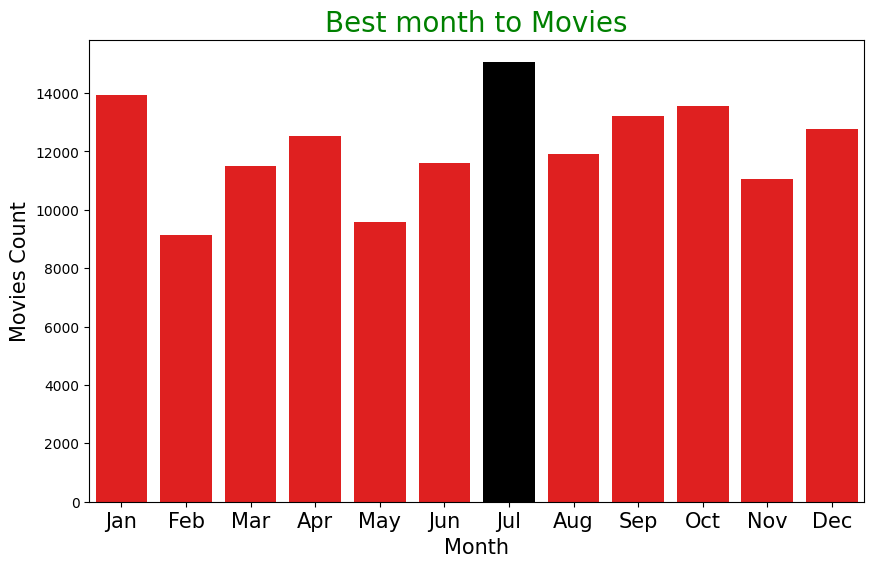

In [48]:
plt.figure(figsize=(10, 6))
cond_color_palette = ['red' if (x < max(movie_data_monthGroup.show_id)) else 'black' for x in movie_data_monthGroup.show_id]
sns.barplot(x = movie_data_monthGroup.month_added.unique(), y = movie_data_monthGroup.show_id, palette = cond_color_palette)
plt.xlabel('Month', fontsize= 15, color = 'black')
plt.ylabel('Movies Count',fontsize= 15, color = 'black')
plt.xticks(fontsize = 15)
plt.title("Best month to Movies",fontsize=20, color = 'green')

#### Observations 💡

1. The data suggests that December is the optimal month for launching TV shows and July is the best motnth to release Movies.
2. These months seem to offer a favorable environment for  TV show and Movie premieres.

## Week Wise

In [49]:
tv_data_weekGroup = tv_data.groupby('week_added')['show_id'].apply(lambda x : x.count()).reset_index()

C:\Users\LOKESH\AppData\Local\Temp\ipykernel_22112\3564891889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = tv_data_weekGroup.week_added.unique(), y =


Text(0.5, 1.0, 'Best month to release TV Shows')

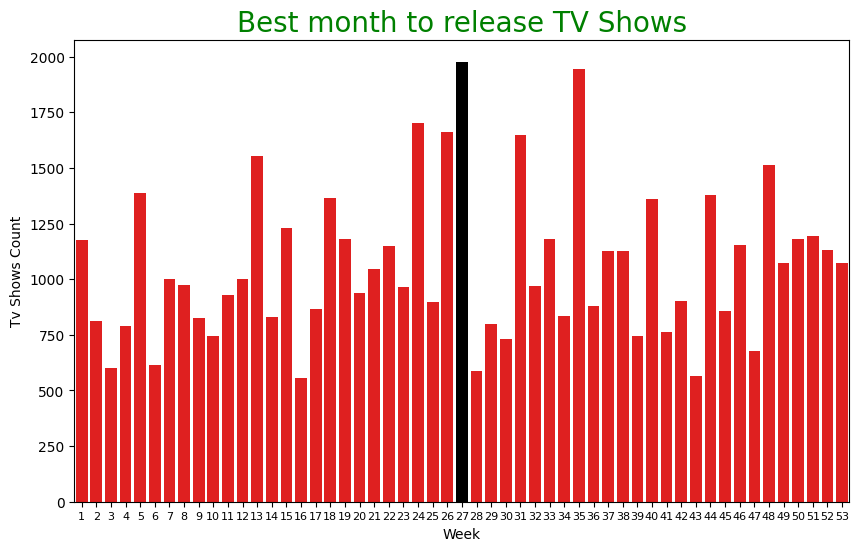

In [50]:
plt.figure(figsize=(10, 6))
cond_color_palette = ['red' if (x < max(tv_data_weekGroup.show_id)) 
 else 'black' for x in tv_data_weekGroup.show_id]
sns.barplot(x = tv_data_weekGroup.week_added.unique(), y =
tv_data_weekGroup.show_id, 
 palette = cond_color_palette)
plt.xlabel('Week', fontsize= 10, color = 'black')
plt.ylabel('Tv Shows Count',fontsize= 10, color = 'black')
plt.xticks(fontsize = 8)
plt.title("Best month to release TV Shows",fontsize=20, color = 'green')

In [51]:
movie_data_weekGroup = movie_data.groupby('week_added')['show_id'].apply(lambda x : x.count()).reset_index()

C:\Users\LOKESH\AppData\Local\Temp\ipykernel_22112\1904362031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = movie_data_weekGroup.week_added.unique(), y = movie_data_weekGroup.show_id, palette = cond_color_palette)


Text(0.5, 1.0, 'Best month to release TV Shows')

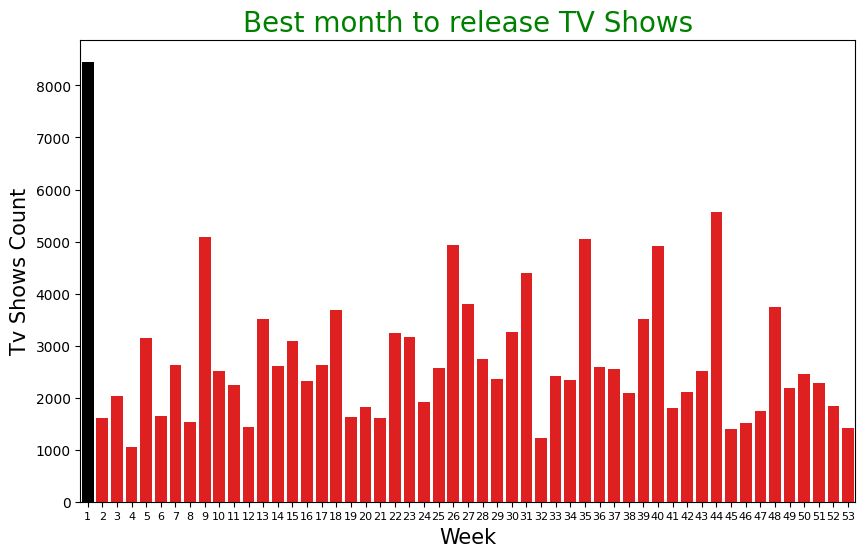

In [52]:
plt.figure(figsize=(10, 6))
cond_color_palette = ['red' if (x < max(movie_data_weekGroup.show_id))  else 'black' for x in movie_data_weekGroup.show_id]
sns.barplot(x = movie_data_weekGroup.week_added.unique(), y = movie_data_weekGroup.show_id, palette = cond_color_palette)
plt.xlabel('Week', fontsize= 15, color = 'black')
plt.ylabel('Tv Shows Count',fontsize= 15, color = 'black')
plt.xticks(fontsize = 8)
plt.title("Best month to release TV Shows",fontsize=20, color = 'green')

#### Observations 💡

1. Data shows that 27th week is the best week to produce TV shows on netflix 
2. 1st week is the best week to release Movies.

# 5. Analysis of actors/directors of Different Types  of Shows / Movies.

In [53]:
movie_dir = movie_data.groupby('director')['show_id'].count().drop('Unknown').sort_values( ascending=False)[:10]
movie_cast = movie_data.groupby('cast')['show_id'].count().drop('Unknown').sort_values( ascending=False)[:10]
tv_dir = tv_data.groupby('director')['show_id'].count().drop('Unknown').sort_values( ascending=False)[:10]
tv_cast = tv_data.groupby('cast')['show_id'].count().drop('Unknown').sort_values( ascending=False)[:10]

C:\Users\LOKESH\AppData\Local\Temp\ipykernel_22112\4136818985.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= movie_dir.index, y = movie_dir.values, palette= netflix_color_palette)
C:\Users\LOKESH\AppData\Local\Temp\ipykernel_22112\4136818985.py:2: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x= movie_dir.index, y = movie_dir.values, palette= netflix_color_palette)


Text(0.5, 1.0, 'Director Vs Movies')

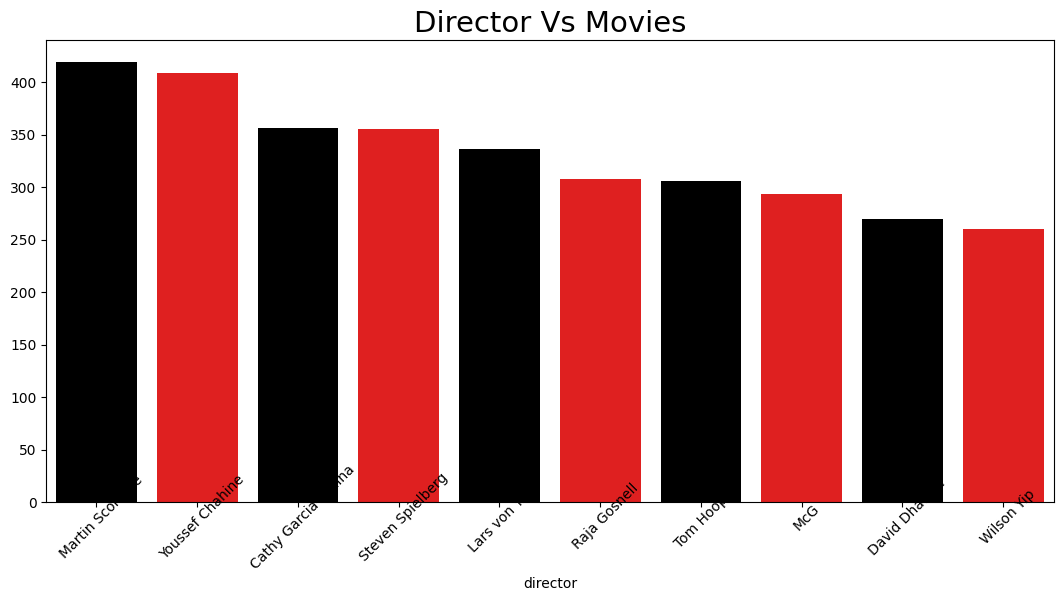

In [54]:
plt.figure(figsize=(13, 6))
sns.barplot(x= movie_dir.index, y = movie_dir.values, palette= netflix_color_palette)
plt.xticks(rotation=45, wrap=True)
plt.title('Director Vs Movies', fontsize=21)

C:\Users\LOKESH\AppData\Local\Temp\ipykernel_22112\1877991372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= movie_cast.index, y = movie_cast.values, palette= netflix_color_palette)
C:\Users\LOKESH\AppData\Local\Temp\ipykernel_22112\1877991372.py:2: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x= movie_cast.index, y = movie_cast.values, palette= netflix_color_palette)


Text(0.5, 1.0, 'Cast Vs Movies')

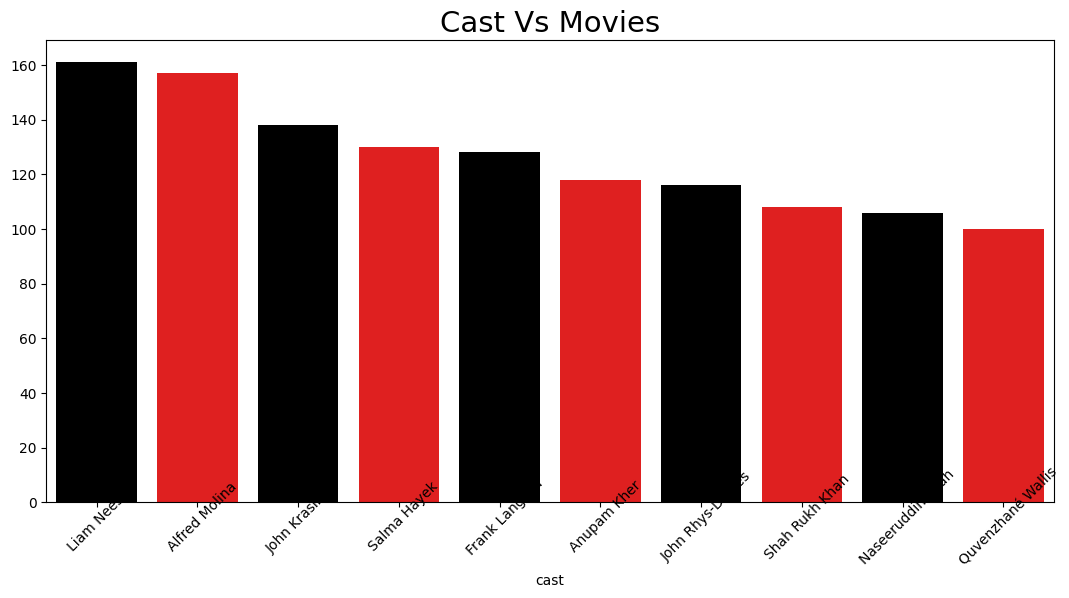

In [55]:
plt.figure(figsize=(13, 6))
sns.barplot(x= movie_cast.index, y = movie_cast.values, palette= netflix_color_palette)
plt.xticks(rotation=45, wrap=True)
plt.title('Cast Vs Movies', fontsize=21)

C:\Users\LOKESH\AppData\Local\Temp\ipykernel_22112\510507701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= tv_dir.index, y = tv_dir.values, palette= netflix_color_palette)
C:\Users\LOKESH\AppData\Local\Temp\ipykernel_22112\510507701.py:2: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x= tv_dir.index, y = tv_dir.values, palette= netflix_color_palette)


Text(0.5, 1.0, 'Director VS TV Shows')

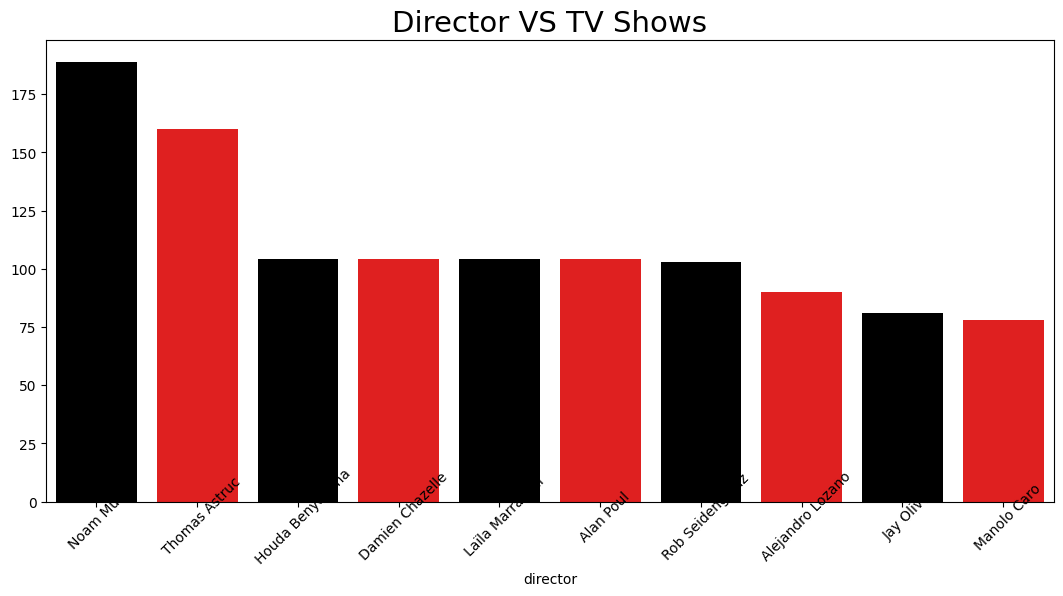

In [56]:
plt.figure(figsize=(13, 6))
sns.barplot(x= tv_dir.index, y = tv_dir.values, palette= netflix_color_palette)
plt.xticks(rotation=45, wrap=True)
plt.title('Director VS TV Shows', fontsize=21)

C:\Users\LOKESH\AppData\Local\Temp\ipykernel_22112\517816581.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= tv_cast.index, y = tv_cast.values, palette= netflix_color_palette)
C:\Users\LOKESH\AppData\Local\Temp\ipykernel_22112\517816581.py:2: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x= tv_cast.index, y = tv_cast.values, palette= netflix_color_palette)


Text(0.5, 1.0, 'Cast VS TV Shows')

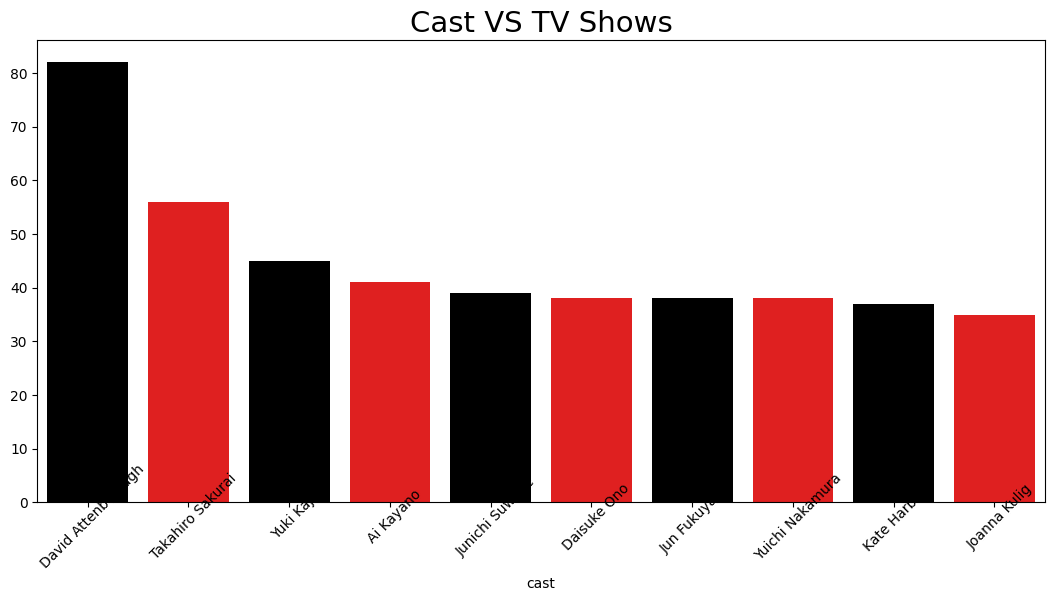

In [57]:
plt.figure(figsize=(13, 6))
sns.barplot(x= tv_cast.index, y = tv_cast.values, palette= netflix_color_palette)
plt.xticks(rotation=45, wrap=True)
plt.title('Cast VS TV Shows', fontsize=21)

#### Observations 💡

From the above plots it is known that: 
1. Best director for movies is 'Martin Scorsense'
2. Best actor for movies is 'Liam Neeson'
3. Best director for tv shows is 'Noam Murro'
4. Best actor for tv  shows is 'David Attenborough

# 6. Which Genre movies are More Popular or Produced more

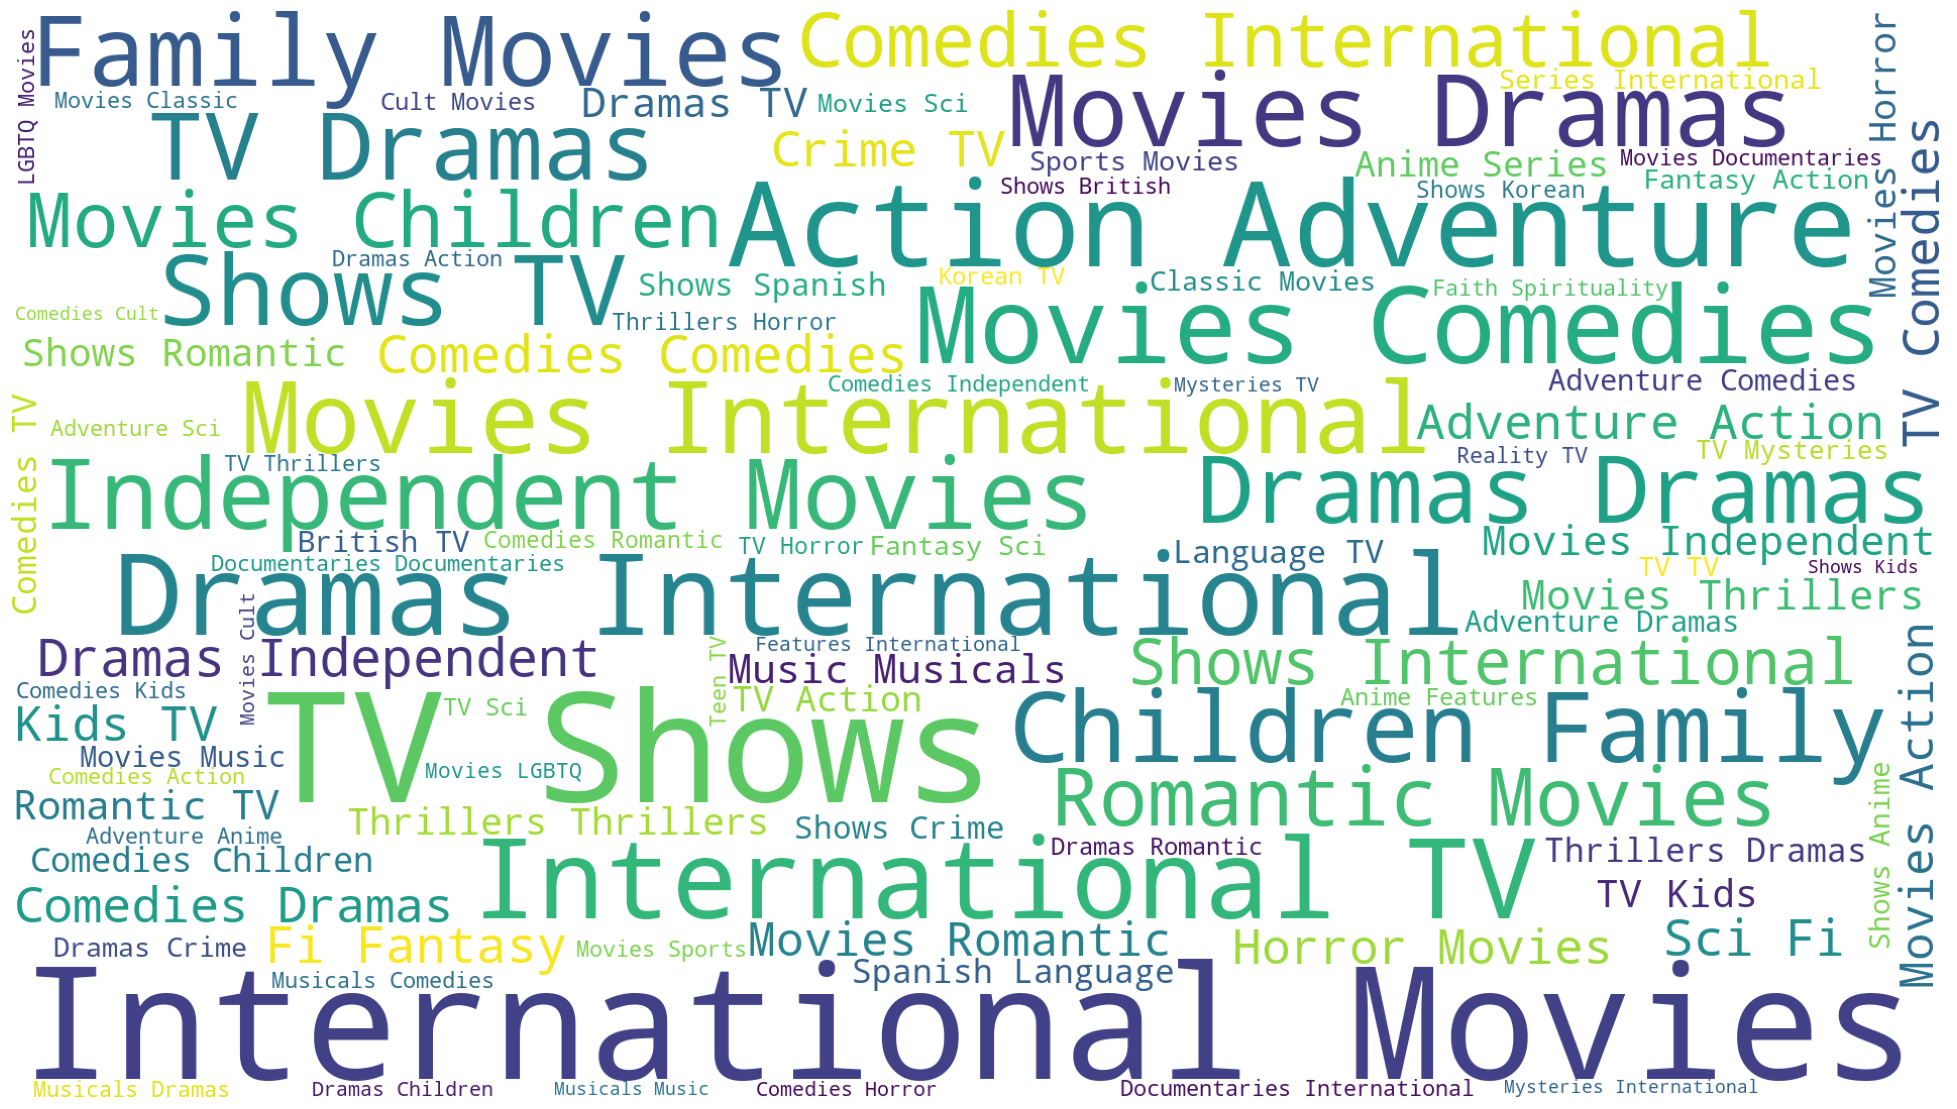

In [58]:
plt.figure(figsize=(25,15))
text = str(list(df['listed_in'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
# word cloud image
wordcloud = WordCloud(stopwords=STOPWORDS, max_words=100, background_color='white',width=1920,height=1080).generate(text)
 
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

#### Observations 💡

From the above word cloud , "International movies" are produced more on netflix and 
next to it will be TV shows

# 7. Does Netflix has More Focus on TV Shows than Movies in recent years

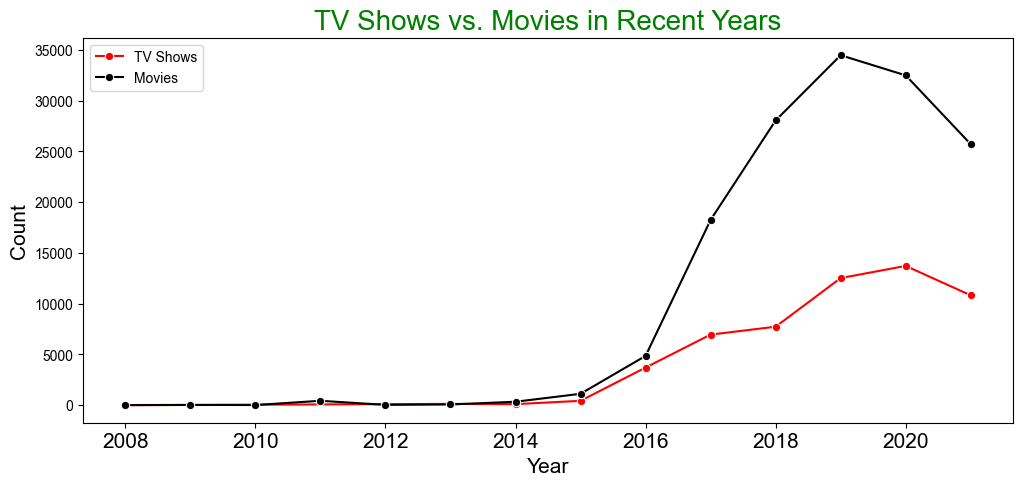

In [59]:
grpd_tv_data = tv_data.groupby('year_added')['show_id'].count().reset_index()
grpd_movie_data = movie_data.groupby('year_added')['show_id'].count().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(x = grpd_tv_data.year_added , y = grpd_tv_data.show_id, color='red', marker = 'o', label= 'TV Shows')
sns.lineplot(x = grpd_movie_data.year_added , y = grpd_movie_data.show_id, color = 'black', marker = 'o', label= 'Movies')
sns.set_theme(style='white')
plt.xlabel('Year', fontsize= 15, color = 'black')
plt.ylabel('Count',fontsize= 15, color = 'black')
plt.xticks(fontsize = 15)
plt.title("TV Shows vs. Movies in Recent Years",fontsize=20, color ='green')
plt.show()

#### Observations 💡

The above line plot shows a parallel Growth of TV Shows and Movies Until 2016, 
followed by exponential movie expansion.

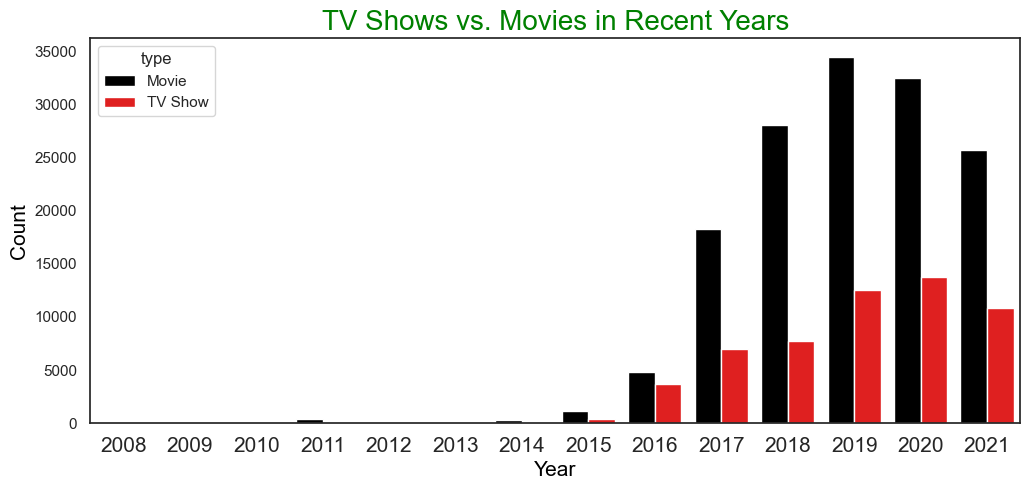

In [60]:
grpd_data = df.groupby(['year_added','type'])['show_id'].count().reset_index()
plt.figure(figsize=(12,5))
cols = sns.color_palette(['black','red'])
sns.barplot(x = grpd_data.year_added , y = grpd_data.show_id, hue=
grpd_data.type, palette = cols )
sns.set_theme(style='white')
plt.xlabel('Year', fontsize= 15, color = 'black')
plt.ylabel('Count',fontsize= 15, color = 'black')
plt.xticks(fontsize = 15)
plt.title("TV Shows vs. Movies in Recent Years",fontsize=20, color ='green')
plt.show()

#### Observations 💡

1. The Movie Boom (2016-2019): Between 2016 and 2019, the movie industry witnessed an 
exponential upswing. </br>
2. Consistent TV Shows: TV shows, on the other hand, held their ground with
a steady pace. </br>
3. The Decline of Movies (Post-2019): The drop in movie production after 2019 raises
intriguing questions like Market Saturation, Return on Investment et

# 8. Understanding What Content is available in Different Countries

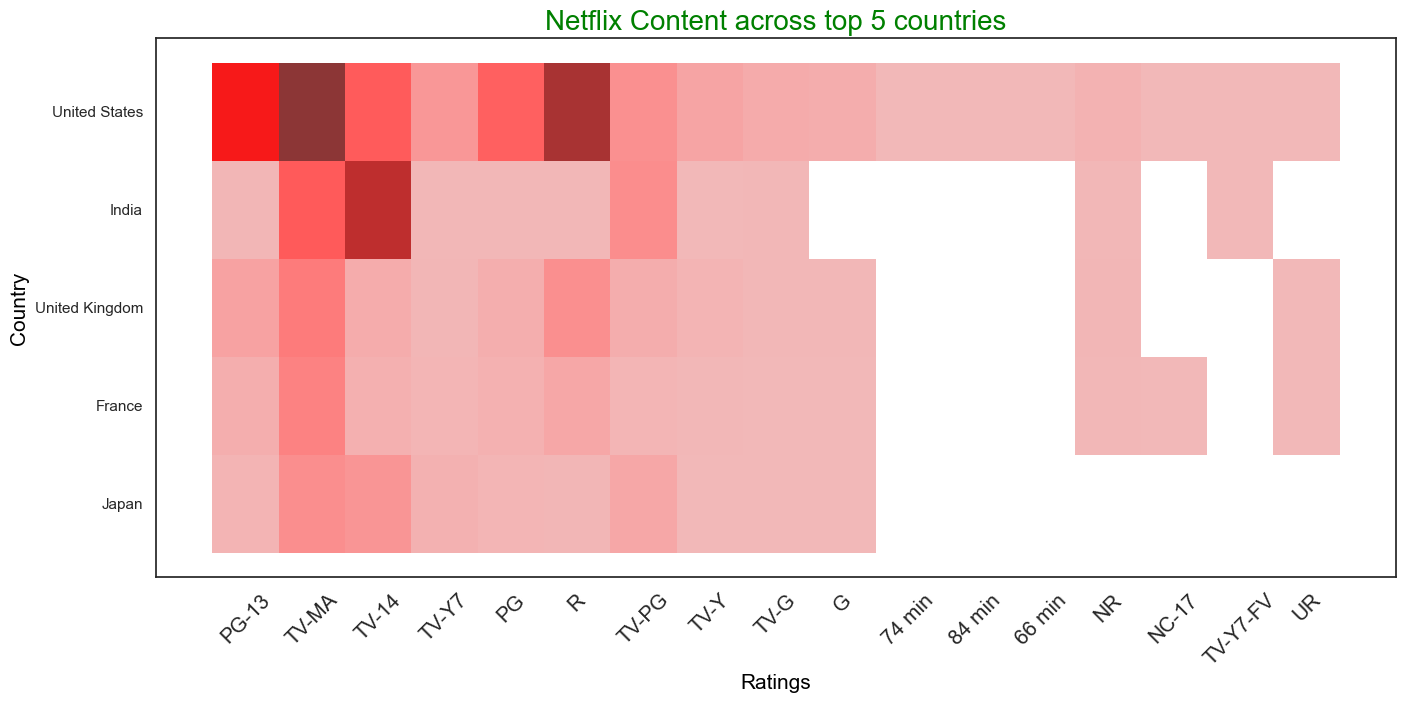

In [61]:
# Getting top 5 countries with content on netflix
top_countries =list(df.country.value_counts().drop('Unknown')[:5].index)
plt.figure(figsize=(16,7))
sns.histplot(data=
df[df['country'].isin(top_countries)], x="rating", y= 'country', color = 'red')
sns.set_theme(style='dark')
plt.xlabel('Ratings', fontsize= 15, color = 'black')
plt.ylabel('Country',fontsize= 15, color = 'black')
plt.xticks(rotation = 45, fontsize = 15)
plt.title("Netflix Content across top 5 countries",fontsize=20, color = 'green')
plt.show()

#### Observations 💡

    The above heatmap shows the ratings across top 5 countries. 
    Netflix content with rating 'TV-MA' is mostly avaible in United States 
    Where as 'TV-14' is the top availabe rated content in India. 
    India has no G, NC-17, UR content availabe where as Japan has no NR, NC-17 , TV-Y7-FV and UR rated content availabe

### 9. Find After how many days the content will be added to Netflix after the release of the movie

In [62]:
df['days_to_add']=df['date_added']-df['release_year']
df['days_to_add'].mode()[0]

Timedelta('547 days 00:00:00')

#### Observations 💡

An average of 547 days are taken to add a movie or a tv show to netflix after its relase. 
(Considering each show or movie is released on jan 1 of the respective release year as the exact 
date of release is not availabe 